# *** Code to predict accounts that could default ***

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filepath =  "C:/Loan_assignment/"   #Add the csv path here to load the data
loan=pd.read_csv(filepath + "loan.csv",encoding="iso-8859-1") #Read the file

#set these properties to make all columns visible
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)

c:\users\arpit\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Step 1: Understand the data

In [21]:
print("\n***Null data***")
print(loan.isnull().sum())

print("\n***NA data***")
print(loan.isna().sum())

print("\n***Loan info about column and datatypes***")
loan.info()

print("\n***More details about the loan***")
loan.describe()


***Null data***
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

***NA data***
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

***Loan info about column and datatypes***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Colu

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Step 2: Data cleaning 

In [22]:
#Remove the null data
loan_without_null=loan.drop(loan[loan.columns[loan.isnull().all()].tolist()],axis=1)
print("Before dropping: ", loan_without_null.shape)

#print("Exporting....")
#loan_without_null.to_csv(filepath + "loan_without_null.csv", index = False) #Exporting

#Adding the columns to be deleted
columns_to_del = ["pymnt_plan","next_pymnt_d","mths_since_last_record","mths_since_last_delinq","tax_liens","policy_code",
                  "application_type","collections_12_mths_ex_med","chargeoff_within_12_mths","acc_now_delinq",
                  "chargeoff_within_12_mths","delinq_amnt","tax_liens","application_type","policy_code","initial_list_status",
                  "out_prncp","out_prncp_inv","desc","url","emp_title"]

#Drop the data that's not needed for analysis
loan_without_null_filtered = loan_without_null.drop(labels = columns_to_del, axis = 1) 
print("So far the data looks like :",loan_without_null_filtered.shape)

print("Post dropping: ", loan_without_null_filtered.shape)

#print("Exporting....")
#loan_without_null_filtered.to_csv(filepath + "loan_without_null_filtered.csv", index = False) #Exporting

#Eliminate rows that are having null values
loan_without_null_filtered=loan_without_null_filtered[~loan_without_null_filtered.emp_length.isnull()]
loan_without_null_filtered=loan_without_null_filtered[~loan_without_null_filtered.pub_rec_bankruptcies.isnull()]
loan_without_null_filtered=loan_without_null_filtered[~loan_without_null_filtered.revol_util.isnull()]
loan_without_null_filtered=loan_without_null_filtered[~loan_without_null_filtered.title.isnull()]
loan_without_null_filtered=loan_without_null_filtered[~loan_without_null_filtered.last_credit_pull_d.isnull()]
loan_without_null_filtered=loan_without_null_filtered[~loan_without_null_filtered.last_pymnt_d.isnull()]                  

#Consider only Fully paid or Charged off as Current will not give the correct picture
loan_without_current=loan_without_null_filtered[(loan_without_null_filtered.loan_status=='Fully Paid')
                                                |(loan_without_null_filtered.loan_status=='Charged Off')]
print("On further clean up, the data looks like :",loan_without_null_filtered.shape)

Before dropping:  (39717, 57)
So far the data looks like : (39717, 40)
Post dropping:  (39717, 40)
On further clean up, the data looks like : (37825, 40)


# 2.1 Post clean up, verify the data again

In [23]:
print("\n***Null data***")
print(loan_without_current.isnull().sum())

print("\n***NA data***")
print(loan_without_current.isna().sum())

print("\n***Loan info about column and datatypes***")
loan_without_current.info()

print("\n***More details about the loan***")
loan_without_current.describe()


***Null data***
id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee        

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.672700e+04,3.672700e+04,36727.000000,36727.000000,36727.000000,36727.000000,3.672700e+04,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000,36727.000000
mean,6.834112e+05,8.518160e+05,11153.772429,10884.731941,10444.972091,325.014427,6.947194e+04,13.337557,0.145996,0.868925,9.305824,0.054102,13386.726958,22.163558,12020.679663,11545.016808,9767.165568,2154.767769,1.341172,97.405239,12.499228,2800.560014,0.041740
std,2.014270e+05,2.529552e+05,7368.371590,7107.535242,7008.417895,208.852376,6.406963e+04,6.649275,0.491422,1.067649,4.375760,0.235423,15857.420519,11.407048,8849.530778,8705.702365,7034.292545,2411.937560,7.205060,700.516552,150.311536,4538.095952,0.200678
min,5.473400e+04,8.036400e+04,500.000000,500.000000,0.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,5.173150e+05,6.679025e+05,5500.000000,5425.000000,5000.000000,167.730000,4.120000e+04,8.220000,0.000000,0.000000,6.000000,0.000000,3735.000000,14.000000,5590.586144,5292.730000,4641.265000,660.775000,0.000000,0.000000,0.000000,223.600000,0.000000
50%,6.600630e+05,8.437850e+05,10000.000000,9600.000000,9000.000000,280.410000,6.000000e+04,13.430000,0.000000,1.000000,9.000000,0.000000,8881.000000,20.000000,9833.880000,9375.810000,8000.000000,1328.680000,0.000000,0.000000,0.000000,592.400000,0.000000
75%,8.310995e+05,1.039903e+06,15000.000000,15000.000000,14355.564545,429.450000,8.300000e+04,18.590000,0.000000,1.000000,12.000000,0.000000,17040.000000,29.000000,16322.698685,15637.765000,13500.000000,2720.660000,0.000000,0.000000,0.000000,3554.765000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [24]:
#Verify how the data shows up perctile format
loan_without_current.annual_inc.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).astype('int64')

count      36727
mean       69471
std        64069
min         4000
5%         24000
10%        30000
25%        41200
50%        60000
75%        83000
90%       117000
95%       142000
99%       235000
max      6000000
Name: annual_inc, dtype: int64

#   2.2 Remove Outliers

**OBSERVATION** :

Please note there are outlier values with int_rate > 21 but they are for only grades D,E,F 
So we cannot delete them as many charged off people are there in these outliers 
and the correlation matrix was not changing much because of this also.

Plotting data


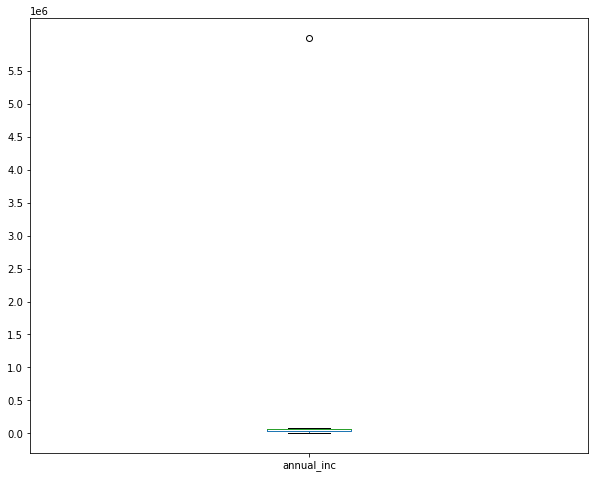

In [25]:
#Plot annual income that shows the outlier data

plt.figure(figsize=(10,8))
plt.yticks(np.arange(0,6000000,500000))
print("Plotting data")
loan_without_current.annual_inc.describe().plot(kind='box')

In [26]:
print("Therefore removing outliers")
loan_without_current=loan_without_current[loan_without_current.annual_inc<235001]

Therefore removing outliers


After removing 1 % outliers
Plotting data


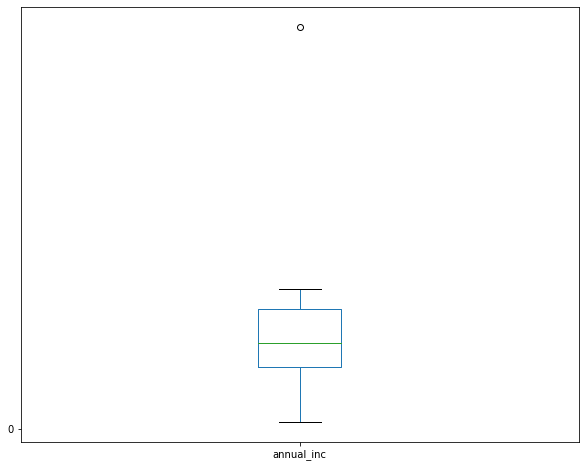

In [27]:
print("After removing 1 % outliers")
plt.figure(figsize=(10,8))
plt.yticks(np.arange(0,6000000,500000))
print("Plotting data")
loan_without_current.annual_inc.describe().plot(kind='box')

# 2.3 Datatype conversion

In [28]:
#Saving the fully paid and Charged off as integer types to make them appear in correlation
def score_to_numeric(x):
    if x=='Fully Paid':
        return 1
    if x=='Charged Off':
        return 2
    
#Change the datatype for Loan status into new column loan_status_num
loan_without_current.loc[:,'loan_status_num'] = loan_without_current['loan_status'].apply(score_to_numeric)

#Format the interest rate into new column int_rate
loan_without_current.loc[:,'int_rate']=loan_without_current.int_rate.str.split("%",expand=True)[0].astype('float64')

#Format the term into existing column term
loan_without_current['term']=loan_without_current['term'].str.split(expand=True)[0].astype('int64')

#Format the grade into same column as integer type
#NOTE: Grade 0 corresponds to A and Grade 6 corresponds to G
loan_without_current['grade']=loan_without_current['grade'].astype('category').cat.codes.astype('int64')

#Format the Home ownership into same column as integer type
loan_without_current['home_ownership']=loan_without_current['home_ownership'].astype('category').cat.codes.astype('int64')

#Print the data so far to verify
loan_without_current.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_status_num
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,1,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,2,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,2
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,2,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,2,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,0,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1


In [29]:
#print("Exporting")
#loan_without_current.to_csv(filepath + "loan_1.csv", index = False) 

# Step 3: Data analysis 

Few columns have been picked up and compared against each other to identify pattern. Few column which didnt make any impact have also been added to show that we covered these columns as part of analysis
    

# Correlation matrix to show how each of the columns are related to each other


In [55]:
print("Print the coorrelation matrix")
corr=loan_without_current.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').set_precision(2) #Setting the precision to 2 decimals only

Print the coorrelation matrix


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,loan_status_num
id,1.00,1.00,0.09,0.10,0.19,0.19,0.01,0.07,-0.03,-0.03,0.04,0.07,-0.01,-0.04,0.03,-0.02,0.04,0.04,0.08,0.15,0.06,0.07,-0.05,0.07,0.05,0.14,-0.00,0.05
member_id,1.00,1.00,0.09,0.10,0.18,0.18,0.01,0.07,-0.03,-0.03,0.04,0.07,-0.01,-0.04,0.03,-0.02,0.04,0.04,0.08,0.15,0.06,0.07,-0.05,0.07,0.05,0.14,-0.00,0.05
loan_amnt,0.09,0.09,1.00,0.99,0.95,0.32,0.24,0.96,0.23,-0.16,0.42,0.07,-0.04,-0.01,0.20,-0.04,0.39,0.27,0.88,0.85,0.83,0.77,-0.02,0.06,0.05,0.45,-0.02,0.05
funded_amnt,0.10,0.10,0.99,1.00,0.97,0.31,0.25,0.97,0.23,-0.15,0.41,0.07,-0.04,-0.01,0.20,-0.04,0.39,0.26,0.89,0.86,0.84,0.78,-0.02,0.06,0.05,0.46,-0.02,0.05
funded_amnt_inv,0.19,0.18,0.95,0.97,1.00,0.33,0.24,0.93,0.21,-0.15,0.40,0.08,-0.04,-0.02,0.19,-0.05,0.37,0.26,0.87,0.90,0.82,0.76,-0.03,0.05,0.04,0.45,-0.03,0.04
term,0.19,0.18,0.32,0.31,0.33,1.00,0.41,0.11,0.41,-0.10,0.08,0.08,0.00,0.05,0.05,0.01,0.09,0.10,0.26,0.27,0.16,0.45,0.02,0.17,0.15,0.18,0.02,0.18
int_rate,0.01,0.01,0.24,0.25,0.24,0.41,1.00,0.24,0.96,0.08,0.05,0.12,0.16,0.17,-0.03,0.10,0.13,-0.08,0.21,0.20,0.10,0.50,0.10,0.20,0.19,0.09,0.08,0.21
installment,0.07,0.07,0.96,0.97,0.93,0.11,0.24,1.00,0.22,-0.12,0.41,0.07,-0.03,-0.00,0.19,-0.04,0.39,0.24,0.87,0.84,0.83,0.73,-0.02,0.03,0.03,0.44,-0.02,0.03
grade,-0.03,-0.03,0.23,0.23,0.21,0.41,0.96,0.22,1.00,0.08,0.04,0.11,0.17,0.15,-0.04,0.11,0.12,-0.08,0.20,0.18,0.10,0.49,0.10,0.19,0.18,0.08,0.09,0.20
home_ownership,-0.03,-0.03,-0.16,-0.15,-0.15,-0.10,0.08,-0.12,0.08,1.00,-0.33,0.02,-0.02,-0.07,-0.22,-0.03,-0.18,-0.34,-0.14,-0.13,-0.14,-0.08,0.03,0.03,0.04,-0.10,-0.04,0.02


In [36]:
print("Verify if Employee length has any impact on loan status. From the below data there is not much of impact and therefore need not be considered for analysis")
(loan_without_current.groupby('emp_length').loan_status.value_counts(normalize=True)*100)

Verify if Employee length has any impact on loan status. From the below data there is not much of impact and therefore need not be considered for analysis


emp_length  loan_status
1 year      Fully Paid     85.911784
            Charged Off    14.088216
10+ years   Fully Paid     84.455518
            Charged Off    15.544482
2 years     Fully Paid     86.901035
            Charged Off    13.098965
3 years     Fully Paid     86.226318
            Charged Off    13.773682
4 years     Fully Paid     86.586863
            Charged Off    13.413137
5 years     Fully Paid     85.869913
            Charged Off    14.130087
6 years     Fully Paid     85.998108
            Charged Off    14.001892
7 years     Fully Paid     84.670659
            Charged Off    15.329341
8 years     Fully Paid     85.889129
            Charged Off    14.110871
9 years     Fully Paid     87.280335
            Charged Off    12.719665
< 1 year    Fully Paid     86.073591
            Charged Off    13.926409
Name: loan_status, dtype: float64

In [37]:
print("Verify if there is any patter of Loan status against purpose. Here we see that debt consolidation has max number of loans")
(loan_without_current.groupby(['purpose']).loan_status.value_counts())

Verify if there is any patter of Loan status against purpose. Here we see that debt consolidation has max number of loans


purpose             loan_status
car                 Fully Paid      1271
                    Charged Off      151
credit_card         Fully Paid      4264
                    Charged Off      495
debt_consolidation  Fully Paid     14628
                    Charged Off     2581
educational         Fully Paid       244
                    Charged Off       47
home_improvement    Fully Paid      2347
                    Charged Off      308
house               Fully Paid       283
                    Charged Off       55
major_purchase      Fully Paid      1831
                    Charged Off      199
medical             Fully Paid       539
                    Charged Off       99
moving              Fully Paid       455
                    Charged Off       80
other               Fully Paid      2989
                    Charged Off      567
renewable_energy    Fully Paid        74
                    Charged Off       17
small_business      Fully Paid      1187
                    Charg

Plot the purpose vs loan status for better clarity. Please note Small business has the highest percentage of charged off.


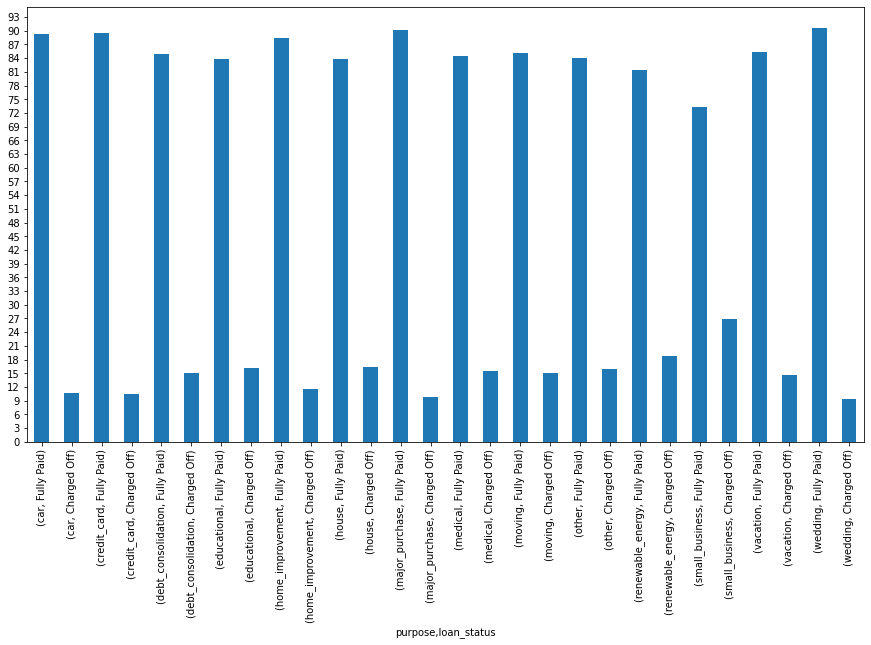

In [40]:
print("Plot the purpose vs loan status for better clarity. Please note Small business has the highest percentage of charged off.")
plt.figure(figsize=(15,8))
plt.yticks(np.arange(0,100,3))
(loan_without_current.groupby(['purpose']).loan_status.value_counts(normalize=True)*100).plot(kind='bar')

Plot grade vs Loan status to check for any pattern. And from this we can determine that: 
 Grade A is the best 
 Grade F & G are the worst


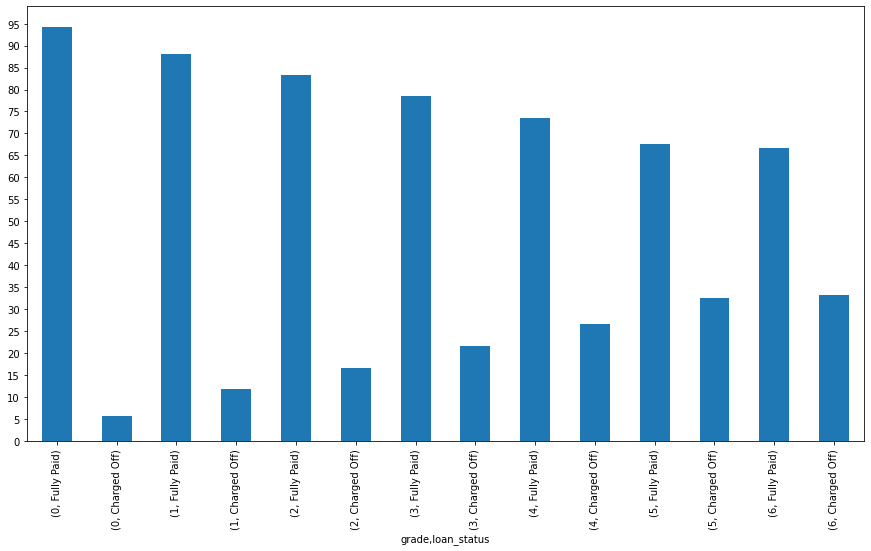

In [43]:
print("Plot grade vs Loan status to check for any pattern. And from this we can determine that: \n Grade A is the best \n Grade F & G are the worst")
print("** Please note this is one of the significant factors in determining accounts that will most likely default. **")
plt.figure(figsize=(15,8))
plt.yticks(np.arange(0,100,5))
(loan_without_current.groupby('grade').loan_status.value_counts(normalize=True)*100).plot(kind='bar')

Plot Term vs Loan status to determine if there is any pattern. From this we can see that Term of 36 months is better than Term of 60 months


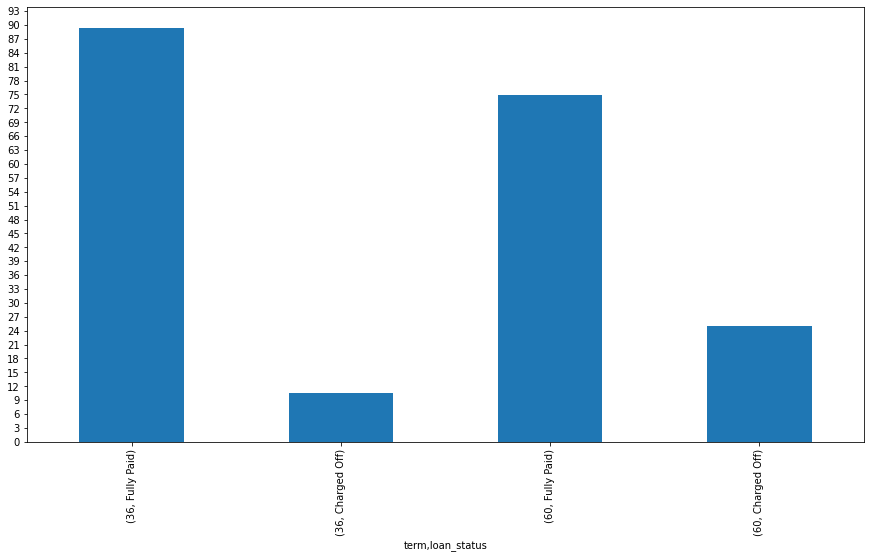

In [44]:
print("Plot Term vs Loan status to determine if there is any pattern. From this we can see that Term of 36 months is better than Term of 60 months")
print("** Please note this is one of the significant factors in determining accounts that will most likely default. **")
plt.figure(figsize=(15,8))
plt.yticks(np.arange(0,100,3))
(loan_without_current.groupby('term').loan_status.value_counts(normalize=True)*100).plot(kind='bar')

# Please note the following 3 sections will show how charged off percentages vary with interest rates. Data has been grouped by Grade

In [45]:
print("Section# 1: For interest rate > 10, please note the charged off rate percentage for different grades")
loan_status_term=loan_without_current[(loan_without_current.int_rate> 10)]
(loan_status_term.groupby('grade').loan_status.value_counts(normalize=True)*100)

Section# 1: For interest rate > 10, please note the charged off rate percentage for different grades


grade  loan_status
1      Fully Paid     87.574619
       Charged Off    12.425381
2      Fully Paid     83.401139
       Charged Off    16.598861
3      Fully Paid     78.421934
       Charged Off    21.578066
4      Fully Paid     73.428799
       Charged Off    26.571201
5      Fully Paid     67.502726
       Charged Off    32.497274
6      Fully Paid     66.666667
       Charged Off    33.333333
Name: loan_status, dtype: float64

In [46]:
print("Section# 2: For interest rate > 15, please note the charged off rate percentage for different grades")
loan_status_term=loan_without_current[(loan_without_current.int_rate> 15)]
(loan_status_term.groupby('grade').loan_status.value_counts(normalize=True)*100)

Section# 2: For interest rate > 15, please note the charged off rate percentage for different grades


grade  loan_status
2      Fully Paid     76.735460
       Charged Off    23.264540
3      Fully Paid     76.706710
       Charged Off    23.293290
4      Fully Paid     73.303894
       Charged Off    26.696106
5      Fully Paid     67.502726
       Charged Off    32.497274
6      Fully Paid     66.666667
       Charged Off    33.333333
Name: loan_status, dtype: float64

In [48]:
print("Section# 3: For interest rate > 20, please note the charged off rate percentage for different grades")
loan_status_term=loan_without_current[(loan_without_current.int_rate> 20)]
(loan_status_term.groupby('grade').loan_status.value_counts(normalize=True)*100)

Section# 3: For interest rate > 20, please note the charged off rate percentage for different grades


grade  loan_status
4      Fully Paid     58.441558
       Charged Off    41.558442
5      Fully Paid     58.418367
       Charged Off    41.581633
6      Fully Paid     66.795367
       Charged Off    33.204633
Name: loan_status, dtype: float64

# From the above sections, its evident that with higher interest rate the percentage of charged off is increasing

In [51]:
print("Verifing the overall counts of each grade to understand the data better")
loan_without_current.groupby('grade').count()

Verifing the overall counts of each grade to understand the data better


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_status_num
grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445,9445
1,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047
2,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377,7377
3,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782,4782
4,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516
5,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917,917
6,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282


In [52]:
print("Checking for the median interest rate for each grade")
loan_without_current.groupby('grade').int_rate.median()

Checking for the median interest rate for each grade


grade
0     7.49
1    10.99
2    13.49
3    15.62
4    17.51
5    19.36
6    20.90
Name: int_rate, dtype: float64

Compare home ownership data against loan status for any pattern. From this we cannot get any outstanding pattern


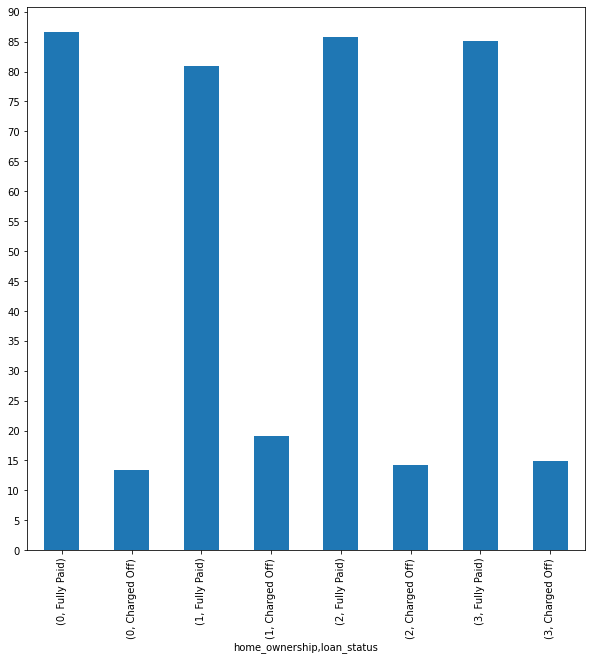

In [56]:
print("Compare home ownership data against loan status for any pattern. From this we cannot get any outstanding pattern")
plt.figure(figsize=(10,10))
plt.yticks(np.arange(0,100,5))

(loan_without_current.groupby(['home_ownership']).loan_status.value_counts(normalize=True)*100).plot(kind='bar')

Plot grade and home ownership vs loan status to get pattern. From this we can see Other in F grade and Own home in Grade have 50% of defaulters


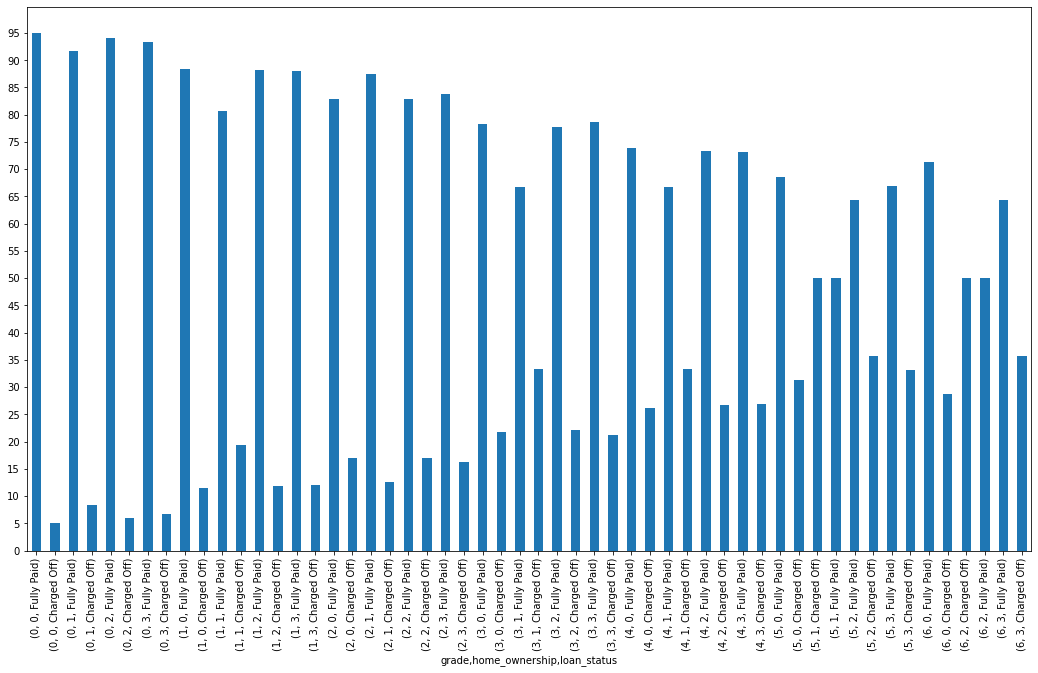

In [57]:
print("Plot grade and home ownership vs loan status to get pattern. From this we can see Other in F grade and Own home in Grade have 50% of defaulters")
plt.figure(figsize=(18,10))
plt.yticks(np.arange(0,100,5))
(loan_without_current.groupby(['grade','home_ownership']).loan_status.value_counts(normalize=True)*100).plot(kind='bar')

Plot interest rate vs issue date for any pattern. From this we can derive that higher the interest rate, more charged off can be observed.


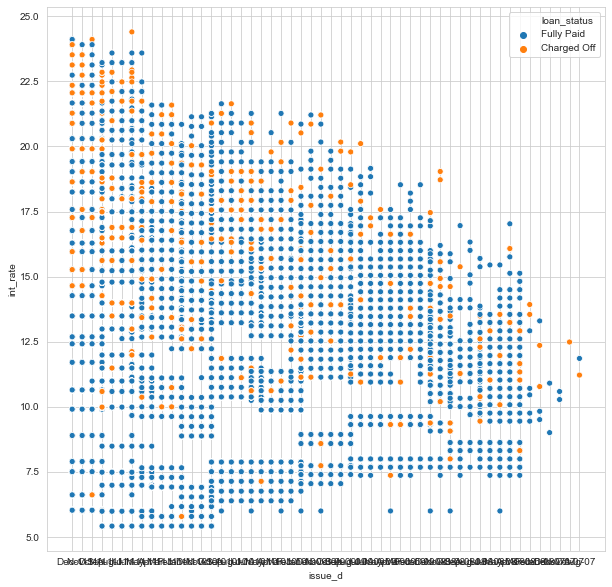

In [59]:
print("Plot interest rate vs issue date for any pattern. From this we can derive that higher the interest rate, more charged off can be observed.")
sns.set_style("whitegrid")

plt.figure(figsize=(10, 10))

sns.scatterplot(x='issue_d', y='int_rate',hue='loan_status' ,data=loan_without_current)

In [60]:
print("Creating 2 new columns to analyze this issue date further")
loan_without_current.loc[: , 'issue_year']=loan_without_current.loc[: ,'issue_d'].str.split("-",expand=True)[1]
loan_without_current.loc[: ,'issue_mon']=loan_without_current.loc[: ,'issue_d'].str.split("-",expand=True)[0]

Creating 2 new columns to analyze this issue date further


In [61]:
print("Checking the number of loans for each each from 2007 to 2011 to understand the data better")
loan_without_current.groupby('issue_year').loan_status.value_counts()

Checking the number of loans for each each from 2007 to 2011 to understand the data better


issue_year  loan_status
07          Fully Paid         5
            Charged Off        2
08          Fully Paid       931
            Charged Off      168
09          Fully Paid      4062
            Charged Off      575
10          Fully Paid      9686
            Charged Off     1371
11          Fully Paid     16517
            Charged Off     3049
Name: loan_status, dtype: int64

Plot issue month vs number of loans to check if there is any spike of loans for any selected month. 
And from this we can derive that Oct, Nov, Dec loans are pretty high.


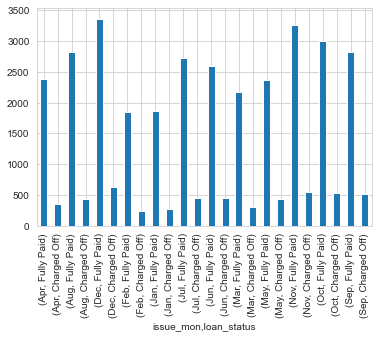

In [65]:
print("Plot issue month vs number of loans to check if there is any spike of loans for any selected month. \nAnd from this we can derive that Oct, Nov, Dec loans are pretty high.")
loan_without_current.groupby('issue_mon').loan_status.value_counts().plot(kind='bar')

Plot issue year vs percentage of loans to check if there is any spike of loans over the years. 
From this we dont derive any pattern as such.


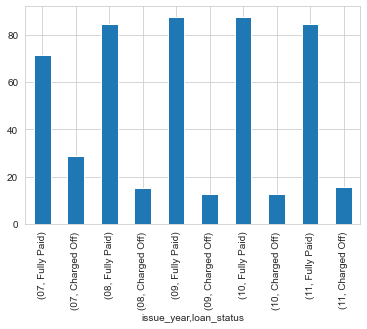

In [66]:
print("Plot issue year vs percentage of loans to check if there is any spike of loans over the years. \nFrom this we dont derive any pattern as such.")
(loan_without_current.groupby('issue_year').loan_status.value_counts(normalize=True)*100).plot(kind='bar')

Plot issue month vs percentage of loans to check if there is any spike of loans over any selected month. 
From this we dont derive any pattern as such.


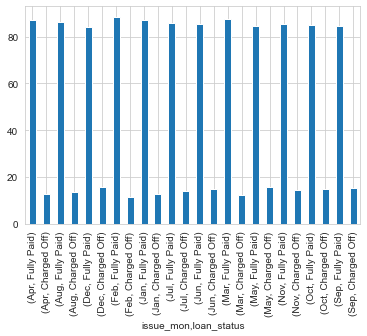

In [67]:
print("Plot issue month vs percentage of loans to check if there is any spike of loans over any selected month. \nFrom this we dont derive any pattern as such.")
(loan_without_current.groupby('issue_mon').loan_status.value_counts(normalize=True)*100).plot(kind='bar')

Plot the interest rate vs issue year to check how the interest rate is varying over years.
From the previous analysis we have already derived interest rate has impact on loan status.


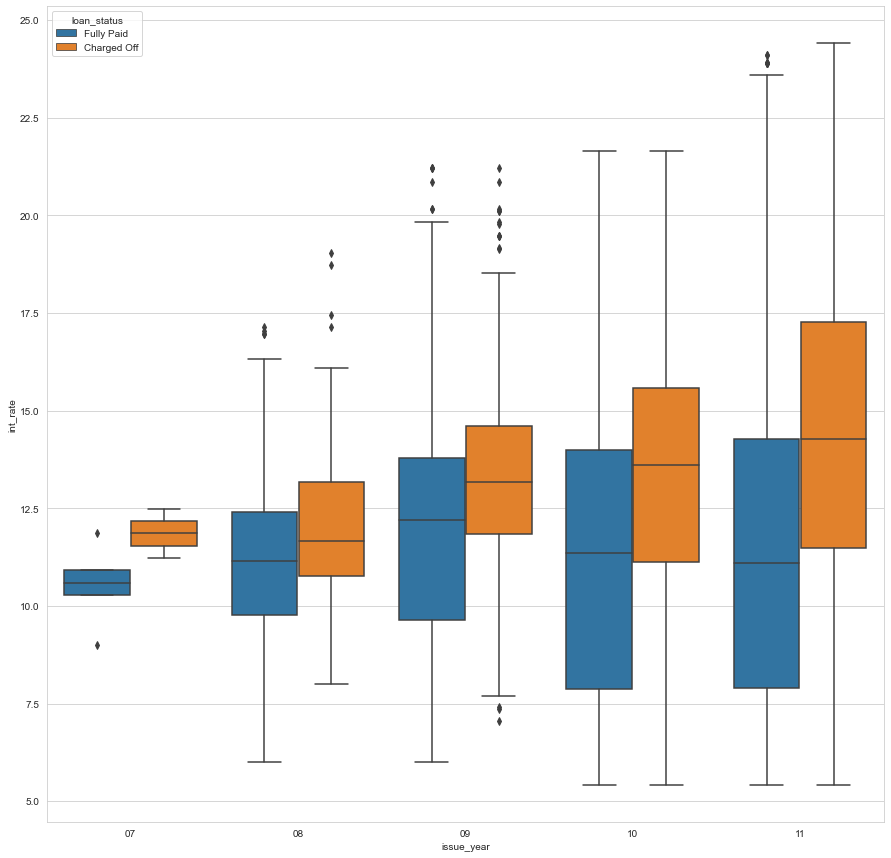

In [70]:
print("Plot the interest rate vs issue year to check how the interest rate is varying over years.\nFrom the previous analysis we have already derived interest rate has impact on loan status.")
sns.set_style("whitegrid")

plt.figure(figsize=(15, 15))

sns.boxplot(x='issue_year', y='int_rate',hue='loan_status' ,data=loan_without_current)

Plot the interest rate vs issue month to check how the interest rate is varying over selected month.
From the previous analysis we have already derived interest rate has impact on loan status.


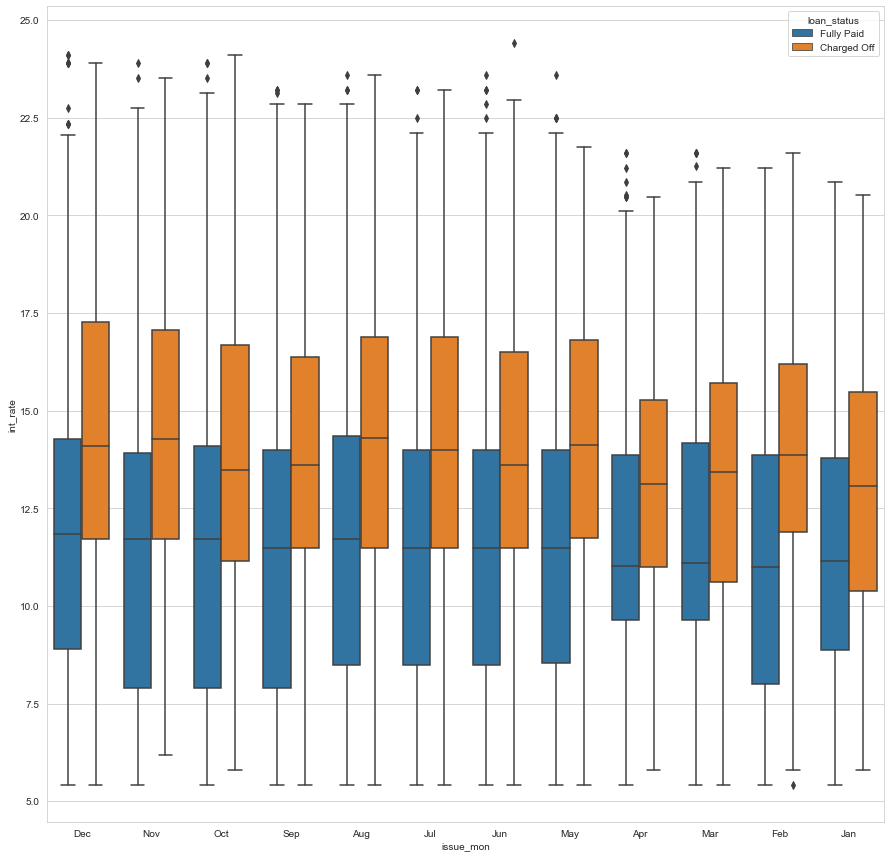

In [71]:
print("Plot the interest rate vs issue month to check how the interest rate is varying over selected month.\nFrom the previous analysis we have already derived interest rate has impact on loan status.")
sns.set_style("whitegrid")

plt.figure(figsize=(15, 15))

sns.boxplot(x='issue_mon', y='int_rate',hue='loan_status' ,data=loan_without_current)

In [73]:
print("Making few more changes in columns to analyze the age data better")
loan_without_current['earliest_cr_line']=pd.to_datetime(loan_without_current['earliest_cr_line'],format='%b-%y')
loan_without_current['issue_d']=pd.to_datetime(loan_without_current['issue_d'],format='%b-%y')
loan_without_current['age']=(loan_without_current['issue_d']-loan_without_current['earliest_cr_line'])
loan_without_current['age']=(loan_without_current['age']/np.timedelta64(1,'Y')).astype('int64')
loan_without_current['age'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

Making few more changes in columns to analyze the age data better


count    36366.000000
mean        12.918715
std          7.007524
min        -60.000000
5%           4.000000
10%          5.000000
25%          8.000000
50%         12.000000
75%         16.000000
90%         22.000000
95%         25.000000
99%         33.000000
max         42.000000
Name: age, dtype: float64

Plotting data to check if there is any pattern with age column. Please note: 
There are few rows with negative age 
There is spike in loan for age group of 10-12 which doesnt realistic.


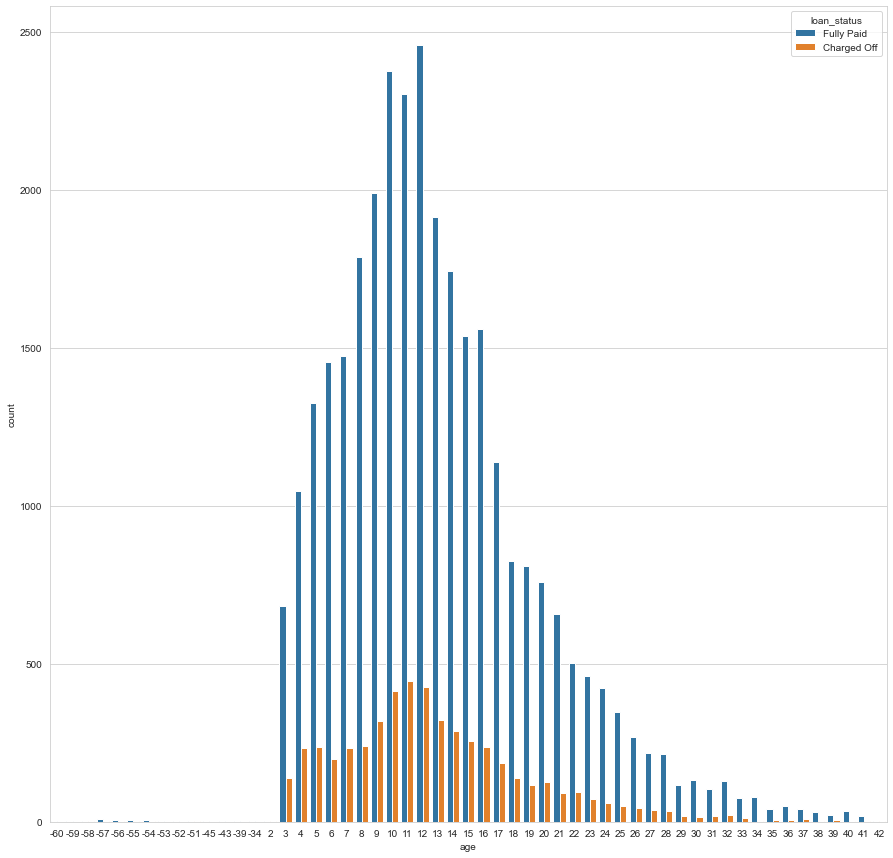

In [78]:
print("Plotting data to check if there is any pattern with age column. Please note: \nThere are few rows with negative age \nThere is spike in loan for age group of 10-12 which doesnt realistic.")
sns.set_style("whitegrid")
plt.figure(figsize=(15, 15))
sns.countplot(x='age',hue='loan_status' ,data=loan_without_current)

Trying to clean up rows with negative age to analyze further
Plotting data to check if there is any pattern with cleaned up age column. Please note there is realistic pattern from age and therefore need not be considered for analysis.


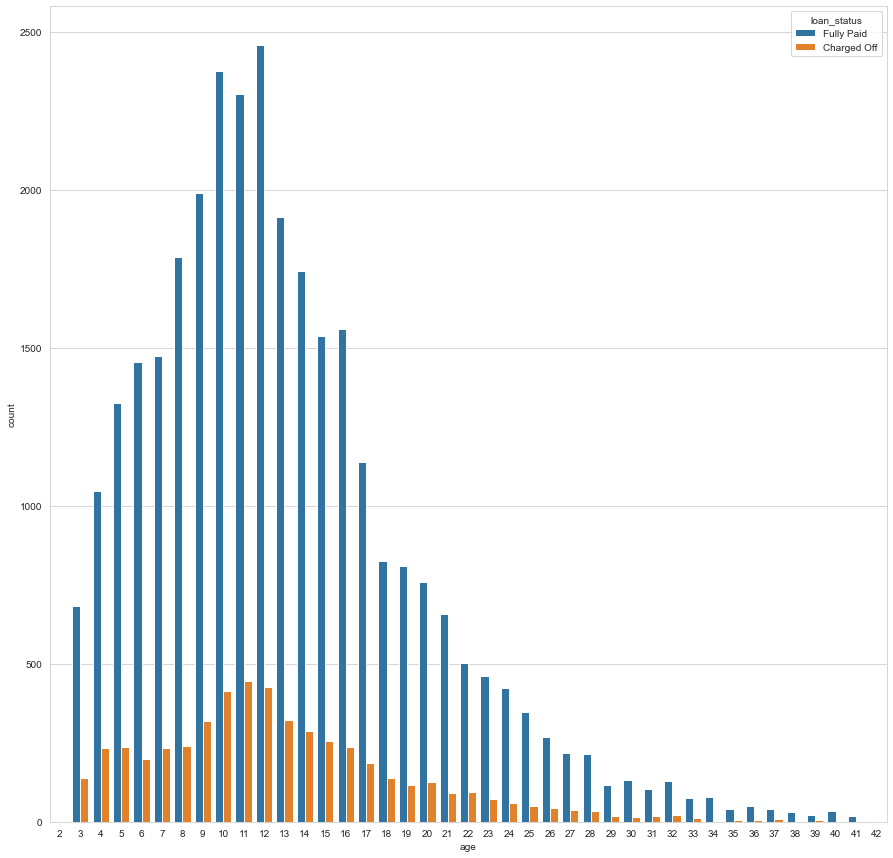

In [80]:
print("Trying to clean up rows with negative age to analyze further")
loan_without_negative=loan_without_current[loan_without_current.age > 0]

print("Plotting data to check if there is any pattern with cleaned up age column. Please note there is realistic pattern from age and therefore need not be considered for analysis.")
sns.set_style("whitegrid")
plt.figure(figsize=(15, 15))
sns.countplot(x='age',hue='loan_status' ,data=loan_without_negative)

Plot loan status vs interest rate to check if there is any pattern. From this below plot we can determine that higher the interest rate, there is more chances of getting charged off.


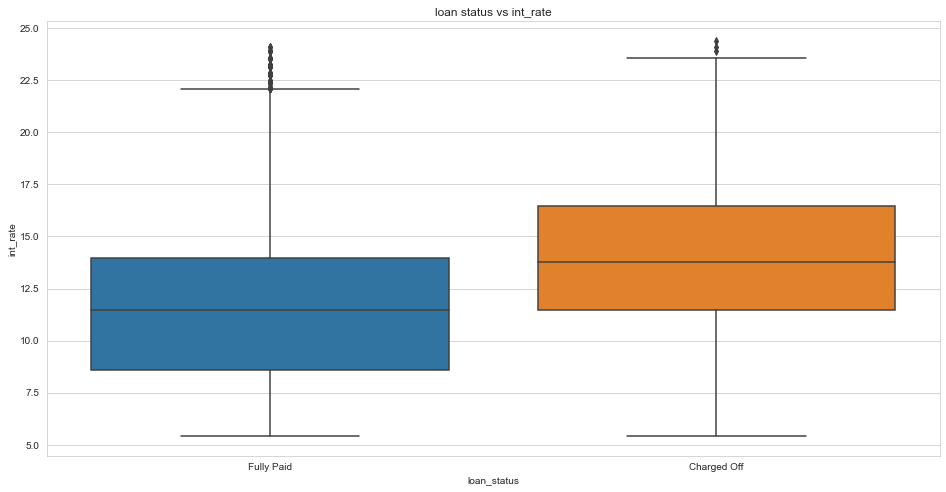

In [84]:
print("Plot loan status vs interest rate to check if there is any pattern. From this below plot we can determine that higher the interest rate, there is more chances of getting charged off.")
sns.set_style("whitegrid")

plt.figure(figsize=(16, 8))
plt.title('loan status vs int_rate')
sns.boxplot(x='loan_status', y='int_rate', data=loan_without_current)

Plot verification_status vs count of loan_status types to check if there is any pattern. From this, Verified people have higher charged off marginally which doesnt look right and therefore will not be considered for analysis.


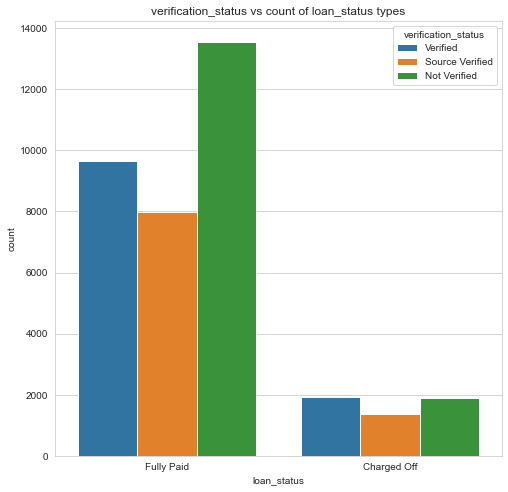

In [87]:
print("Plot verification_status vs count of loan_status types to check if there is any pattern. From this, Verified people have higher charged off marginally which doesnt look right and therefore will not be considered for analysis.")
sns.set_style("whitegrid")

plt.figure(figsize=(8, 8))
plt.title('verification_status vs count of loan_status types')

sns.countplot(x='loan_status', hue='verification_status', data=loan_without_current)

Plot installment vs count of loan status to check if there is any pattern. From this we are not able to derive anything and therefore will be ignored.


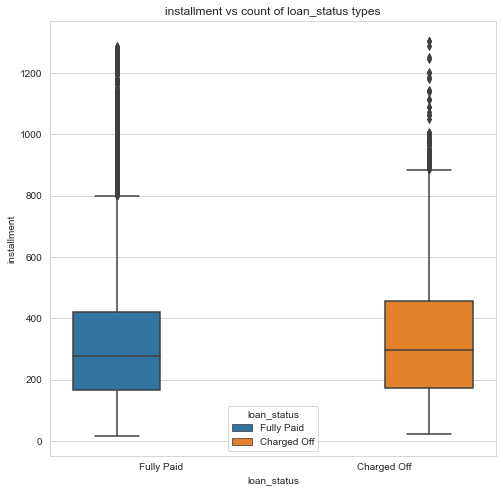

In [90]:
print("Plot installment vs count of loan status to check if there is any pattern. From this we are not able to derive anything and therefore will be ignored.")
sns.set_style("whitegrid")

plt.figure(figsize=(8, 8))
plt.title('installment vs count of loan_status types')

sns.boxplot(x='loan_status',y='installment', hue='loan_status', data=loan_without_current)

Plot the total account number vs  count of the loan status type to check any pattern. From this we dont see any significant pattern and therefore can be ignored.


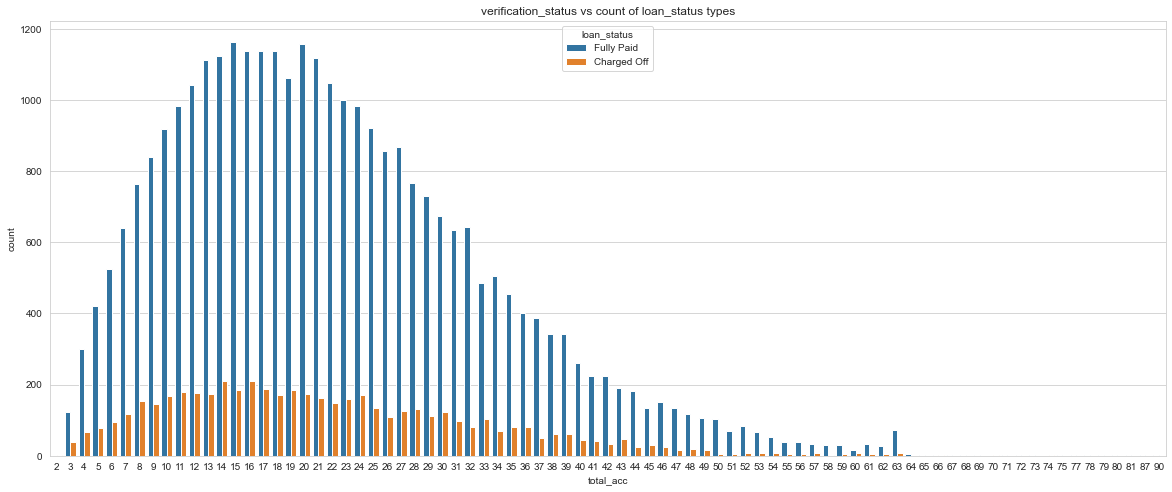

In [92]:
print("Plot the total account number vs  count of the loan status type to check any pattern. From this we dont see any significant pattern and therefore can be ignored.")
sns.set_style("whitegrid")

plt.figure(figsize=(20, 8))
plt.title('verification_status vs count of loan_status types')

sns.countplot(x='total_acc', hue='loan_status', data=loan_without_current)

Plot total account vs loan status. And from this we can determine that there marginal negative relationship however its not conclusive enough. And therfore will not be considered for analysis.


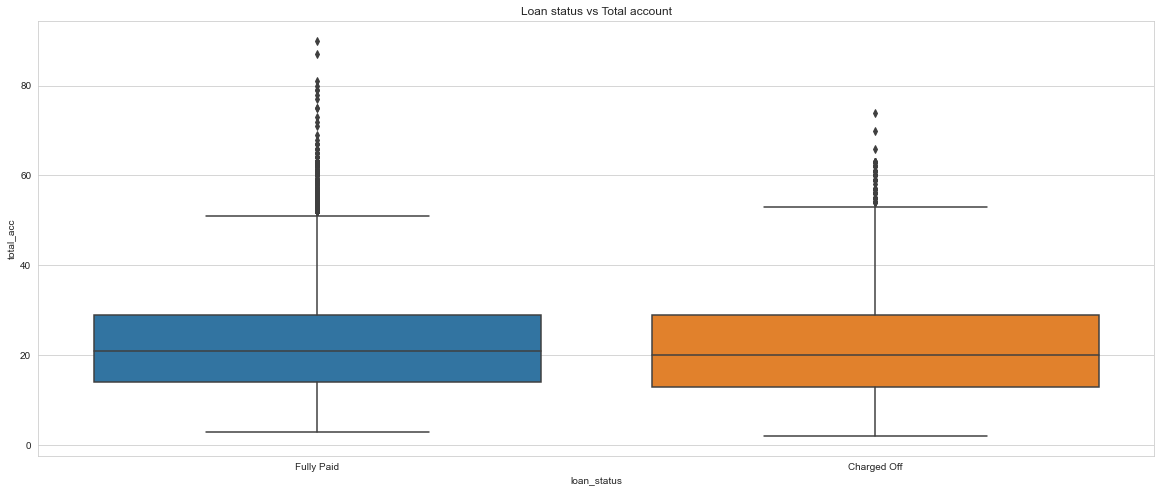

In [94]:
print("Plot total account vs loan status. And from this we can determine that there marginal negative relationship however its not conclusive enough. And therfore will not be considered for analysis.")
sns.set_style("whitegrid")

plt.figure(figsize=(20, 8))
plt.title('Loan status vs Total account')

sns.boxplot(x='loan_status',y='total_acc', data=loan_without_current)

Plot Loan status vs annual income to determine if there is any pattern. Again from this there is no significant pattern and therefore need not be part of analysis


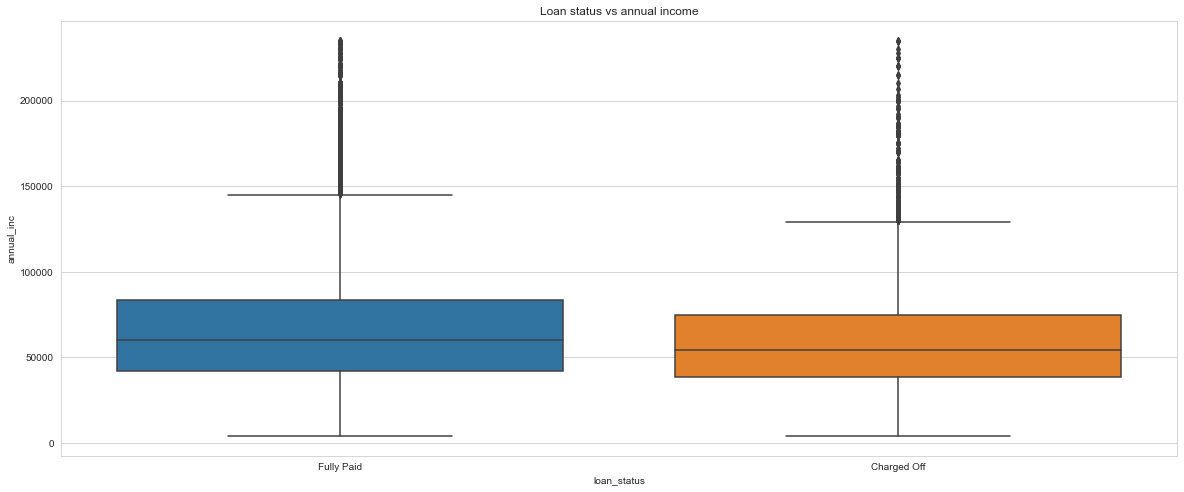

In [95]:
print("Plot Loan status vs annual income to determine if there is any pattern. Again from this there is no significant pattern and therefore need not be part of analysis")
sns.set_style("whitegrid")

plt.figure(figsize=(20, 8))
plt.title('Loan status vs annual income')

sns.boxplot(x='loan_status', y='annual_inc', data=loan_without_current)

Plot grade vs interest rate. .And from this we can determine for Grade F and G has higher interest rate and higher percentage of charged off as compared to other grades.
** Please note this is one of the significant factors in determining accounts that will most likely default. **


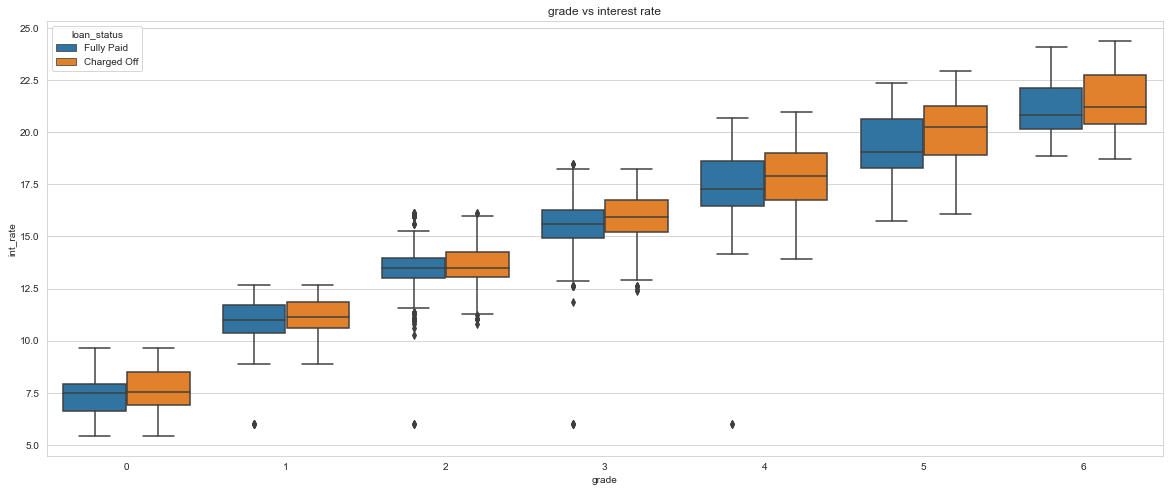

In [97]:
print("Plot grade vs interest rate. .And from this we can determine for Grade F and G has higher interest rate and higher percentage of charged off as compared to other grades.")
print("** Please note this is one of the significant factors in determining accounts that will most likely default. **")
sns.set_style("whitegrid")

plt.figure(figsize=(20, 8))
plt.title('grade vs interest rate')

sns.boxplot(x='grade',y='int_rate', hue='loan_status', data=loan_without_current)

Plot state vs count of loans to check if there is any pattern. From this Top 3 locations that higher spike of loans is:
1: California 
2: New York 
3: Texas


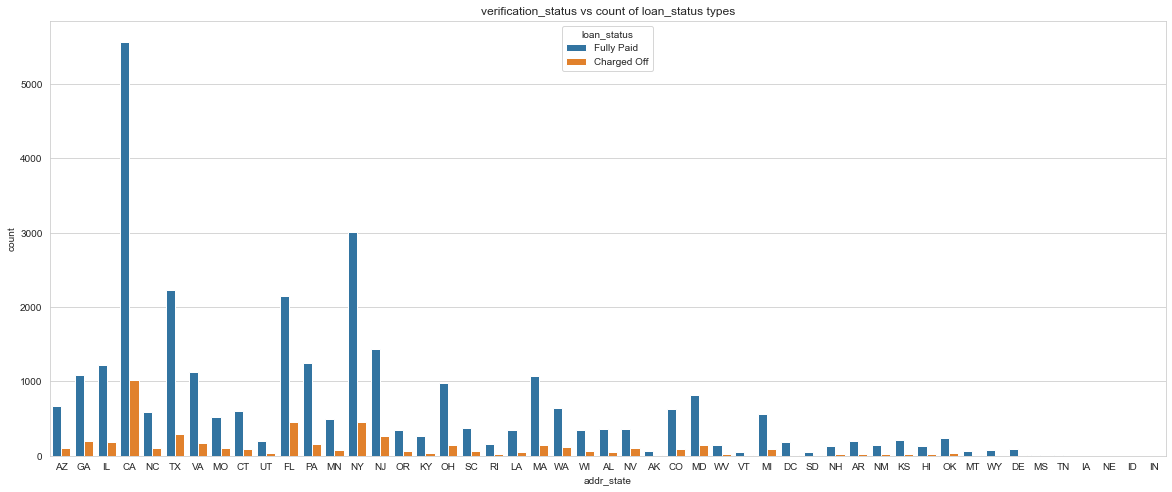

In [101]:
print("Plot state vs count of loans to check if there is any pattern. From this Top 3 locations that higher spike of loans is:")
print("1: California \n2: New York \n3: Texas")
sns.set_style("whitegrid")

plt.figure(figsize=(20, 8))
plt.title('verification_status vs count of loan_status types')

sns.countplot(x='addr_state', hue='loan_status', data=loan_without_current)

# Step 4: To conclude the most important factors to identify defaulting loans is:
1. Interest rate: Higher the interest rate, more likely the person is going to default
2. Grade: People with Grade F, G are most likely to default. Grade A and A1 being the best of the whole lot.
3. Term: Peeple taking loans for 60 months are most likely to defauly and loans with 30 months is faring better.